# [Video Game]
#### Data World 
    *https://data.world/craigkelly/steam-game-data
    [Shareholder] They are a publisher, they want buy a new team but want to make sure they make good choice
        [Question1] Can we build a predict/regression model to predict a potential interval for steamspyowners? 
        [Question2] Metacritic scores are from 0 -100. Could we build a classifer model?
#### Kaggle
	*https://www.kaggle.com/gregorut/videogamesales
	*https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
	*https://www.kaggle.com/kendallgillies/video-game-sales-and-ratings
     [Shareholder] They are a publisher is looking for recommendations for what types of game to make
         [Question1] Can we pridict Global_Sales


# [Animals]
##### Kaggle 
    *https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and
    [Shareholder] ?????
    
    [Not Enough]https://www.kaggle.com/mbogernetto/brazilian-amazon-rainforest-degradation
    [Not independent]https://www.kaggle.com/se18m502/bee-hive-metrics#weight_2017.csv
    [Not independent]https://www.kaggle.com/hocop1/cat-and-dog-breeds-parameters
    [Not independent]https://www.kaggle.com/jessicali9530/honey-production
    
# [Medical]
##### Kaggle
    [Not independent]https://www.kaggle.com/de5d5fe61fcaa6ad7a66/coronavirus-dataset-update-0206

# [Vehicle]
##### Data World
    https://data.world/nhtsa/nhtsas-odi-recalls/workspace/project-summary?agentid=nhtsa&datasetid=nhtsas-odi-recalls

##### Kaggle
    https://www.kaggle.com/austinreese/craigslist-carstrucks-data
    [ShareHolder] A small start up want to build an app to help people buy better cars off craiglist. 
        [Question1] Can we classify the cars by title_status?
        [Question2] Can we predict the odometer for the car?
        [Question3] Can we classify condition
        
    *https://www.kaggle.com/mirosval/personal-cars-classifieds
    [ShareHolder] Find cars for people app
        [Question]The user get an estimate of price_eur based on car details
        
# [Misc]
##### Buzzfeed
    *https://github.com/BuzzFeedNews/2014-06-firework-injuries
    [Shareholder] We're an evil insurance company, which collection of people should we raise the price? 
    [Question]
    
    *https://www.kaggle.com/rusiano/snooker-data-19822020#players_r.csv

# Video Game Sales Model
### Goals
This project aims to answer 2 questions

* Rather the population size of a region has a relation to carbon emissions.
* Was there a significant effect on carbon emissions based on year and state

### Project Members:
* Laurent Mundell
* Joe Hart


### Table of Contents
    -Imports
    -Data Sources
    -Methods/Globals/Constants
    -Load Data
    -Explore Data Analysis
    -Explore Data Visuals
    -Data Prep
    -Hypothesis Test I
    -Hypothesis Test II


* [Video Game Sales with Ratings](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings)
* [Google Trends work around](https://www.quora.com/How-can-I-see-absolute-search-number-volume-on-Google-Trends)

# [from past self] laurent remember to uninstall pyautogui module in python from you computer.

# Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
%matplotlib inline

In [90]:
video_game_df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

# Methods/Globals/Constants

In [107]:
def fillna_average_by_target_column(row, avg_dict, target_col, effected_col):
    """
    When given a row of a dataframe, this method will use the target column to fill nan values with 
    the average associated with the catagorical values in the effected column. 
    
    Parameters
    ----------
    row :  Dataframe row.
    avg_dict : A dictionary of the average of the catagorical values in the target column of the dataframe
    target_col : index of where the target column is in the dataframe
    effected_col :  index of where the effected column is in the dataframe
    
    Returns
    -------
    a dataframe row with effect column value changed if it is null
    """
    try:
        if np.isnan(row[effected_col]):      
            row[effected_col] = np.round(avg_dict[row[target_col]], 2)
    except:
        row[effected_col] = "???"
        
    return row

def check_string_not_numeric(data):
    """
    Find all string values in a column that cannot be converted to a numeric value and transforms then into np.nan
    values.
    
    Parameters
    ----------
    data: a value of the column
    
    Returns
    -------
    np.nan OR column value unchanged
    """
    # Is the data a string
    if isinstance(data, str):
        
        #Check if the string can be numeric
        if data.isnumeric() == False:
            return np.nan
            

GENRE_CRITIC_SCORE_AVG = {'Sports' : video_game_df[video_game_df['Genre'] == 'Sports']['Critic_Score'].mean(),
              'Platform': video_game_df[video_game_df['Genre'] == 'Platform']['Critic_Score'].mean(),
              'Racing': video_game_df[video_game_df['Genre'] == 'Racing']['Critic_Score'].mean(),
              'Role-Playing': video_game_df[video_game_df['Genre'] == 'Role-Playing']['Critic_Score'].mean(),
              'Puzzle': video_game_df[video_game_df['Genre'] == 'Puzzle']['Critic_Score'].mean(),
              'Misc': video_game_df[video_game_df['Genre'] == 'Misc']['Critic_Score'].mean(),
              'Shooter': video_game_df[video_game_df['Genre'] == 'Shooter']['Critic_Score'].mean(),
              'Simulation': video_game_df[video_game_df['Genre'] == 'Simulation']['Critic_Score'].mean(),
              'Action': video_game_df[video_game_df['Genre'] == 'Action']['Critic_Score'].mean(),
              'Fighting': video_game_df[video_game_df['Genre'] == 'Fighting']['Critic_Score'].mean(),
              'Adventure' : video_game_df[video_game_df['Genre'] == 'Adventure']['Critic_Score'].mean(),
              'Strategy' : video_game_df[video_game_df['Genre'] == 'Strategy']['Critic_Score'].mean(),
}

GENRE_CRITIC_COUNT_AVG = {'Sports' : video_game_df[video_game_df['Genre'] == 'Sports']['Critic_Count'].mean(),
              'Platform': video_game_df[video_game_df['Genre'] == 'Platform']['Critic_Count'].mean(),
              'Racing': video_game_df[video_game_df['Genre'] == 'Racing']['Critic_Count'].mean(),
              'Role-Playing': video_game_df[video_game_df['Genre'] == 'Role-Playing']['Critic_Count'].mean(),
              'Puzzle': video_game_df[video_game_df['Genre'] == 'Puzzle']['Critic_Count'].mean(),
              'Misc': video_game_df[video_game_df['Genre'] == 'Misc']['Critic_Count'].mean(),
              'Shooter': video_game_df[video_game_df['Genre'] == 'Shooter']['Critic_Count'].mean(),
              'Simulation': video_game_df[video_game_df['Genre'] == 'Simulation']['Critic_Count'].mean(),
              'Action': video_game_df[video_game_df['Genre'] == 'Action']['Critic_Count'].mean(),
              'Fighting': video_game_df[video_game_df['Genre'] == 'Fighting']['Critic_Count'].mean(),
              'Adventure' : video_game_df[video_game_df['Genre'] == 'Adventure']['Critic_Count'].mean(),
              'Strategy' : video_game_df[video_game_df['Genre'] == 'Strategy']['Critic_Count'].mean(),
}

GENRE_USER_SCORE_AVG = {'Sports' : video_game_df[video_game_df['Genre'] == 'Sports']['User_Score'].mean(),
              'Platform': video_game_df[video_game_df['Genre'] == 'Platform']['User_Score'].mean(),
              'Racing': video_game_df[video_game_df['Genre'] == 'Racing']['User_Score'].mean(),
              'Role-Playing': video_game_df[video_game_df['Genre'] == 'Role-Playing']['User_Score'].mean(),
              'Puzzle': video_game_df[video_game_df['Genre'] == 'Puzzle']['User_Score'].mean(),
              'Misc': video_game_df[video_game_df['Genre'] == 'Misc']['User_Score'].mean(),
              'Shooter': video_game_df[video_game_df['Genre'] == 'Shooter']['User_Score'].mean(),
              'Simulation': video_game_df[video_game_df['Genre'] == 'Simulation']['User_Score'].mean(),
              'Action': video_game_df[video_game_df['Genre'] == 'Action']['User_Score'].mean(),
              'Fighting': video_game_df[video_game_df['Genre'] == 'Fighting']['User_Score'].mean(),
              'Adventure' : video_game_df[video_game_df['Genre'] == 'Adventure']['User_Score'].mean(),
              'Strategy' : video_game_df[video_game_df['Genre'] == 'Strategy']['User_Score'].mean(),
}


STYLE = {'purple' : '\033[95m',
               'cyan' : '\033[96m',
               'darkcyan' : '\033[36m',
               'blue' : '\033[94m',
               'green' : '\033[92m',
               'yellow' : '\033[93m',
               'red' : '\033[91m',
               'bold' : '\033[1m',
               'underline' : '\033[4m',
               'end' : '\033[0m'
}

TypeError: can only concatenate str (not "int") to str

# Load Data

In [11]:
_  = os.path.join('data', 'Video_Games_Sales_as_at_22_Dec_2016.csv')
video_game_df = pd.read_csv(_)

#### Get search data.... Remove this module

In [ ]:
# Get data from Google Keyword(Please remember to uninstall this module)
import pyautogui
import time 
import pyperclip

In [ ]:
# print(pyautogui.size())
# pyautogui.moveRel(0, 50, duration = 1)  # Start Location
# print(pyautogui.position())
# pyautogui.moveRel(0, 500, duration = 1) # Move by relative space
# pyautogui.click(100, 100) 
# pyautogui.typewrite("hello Geeks !") 
# pyautogui.hotkey("ctrlleft", "a") 

In [ ]:
pyautogui.moveTo(370, 600, duration = 1) # Move to + keyword
pyautogui.click() 
pyautogui.moveRel(0, -150, duration = 1) # Move to enter keyword
pyautogui.click()
pyautogui.typewrite("hello Geeks") 
pyautogui.moveRel(-120, -80, duration = 1) # Move to add key word to plan
pyautogui.click()
pyautogui.moveRel(0, 50, duration = 1)
pyautogui.click()
pyautogui.moveRel(-60, 180, duration = 1)
pyautogui.click()
pyautogui.click()
pyautogui.scroll(2000) 
pyautogui.moveRel(500, -300, duration = 1)
pyautogui.click()
pyautogui.moveRel(375, 170, duration = 4)
pyautogui.click()
pyautogui.click()
pyautogui.click()
pyautogui.hotkey("ctrlleft", "c") 
#df[row][column] = pyperclip.paste()
pyautogui.moveRel(-300, 270, duration = 1)
pyautogui.click()
pyautogui.moveRel(80, -90, duration = 1) #Move back to 
val = input("Enter your value: ") 
pyautogui.moveRel(80, -90, duration = 1)
print(pyautogui.position())

In [ ]:
pyautogui.moveTo(370, 400, duration = 1)
pyautogui.click()
pyautogui.scroll(1000) # Po

# Exploratory Data Analysis

In [108]:
display(video_game_df.head())
display(video_game_df.info())
display(video_game_df.describe().T)
print('Shape:', video_game_df.shape)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.06,23.7,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,72.65,32.49,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       16719 non-null object
Critic_Count       16719 non-null object
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(7), object(9)
memory usage: 2.0+ MB


None

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


Shape: (16719, 16)


In [13]:
for name in video_game_df.columns:
    print('-'*30, STYLE['bold'], name, STYLE['end'],'-'*30)
    display(video_game_df[name].value_counts())

------------------------------  Name  ------------------------------


Need for Speed: Most Wanted                        12
FIFA 14                                             9
LEGO Marvel Super Heroes                            9
Ratatouille                                         9
Madden NFL 07                                       9
LEGO Jurassic World                                 8
Cars                                                8
Angry Birds Star Wars                               8
Monopoly                                            8
FIFA 15                                             8
Madden NFL 08                                       8
Lego Batman 3: Beyond Gotham                        8
LEGO The Hobbit                                     8
FIFA Soccer 13                                      8
LEGO Harry Potter: Years 5-7                        8
LEGO Star Wars II: The Original Trilogy             8
Terraria                                            8
The LEGO Movie Videogame                            8
Pro Evolution Soccer 2012   

------------------------------  Platform  ------------------------------


PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

------------------------------  Year_of_Release  ------------------------------


2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

------------------------------  Genre  ------------------------------


Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

------------------------------  Publisher  ------------------------------


Electronic Arts                           1356
Activision                                 985
Namco Bandai Games                         939
Ubisoft                                    933
Konami Digital Entertainment               834
THQ                                        715
Nintendo                                   706
Sony Computer Entertainment                687
Sega                                       638
Take-Two Interactive                       422
Capcom                                     386
Atari                                      367
Tecmo Koei                                 348
Warner Bros. Interactive Entertainment     235
Square Enix                                234
Disney Interactive Studios                 218
Unknown                                    201
Eidos Interactive                          198
Midway Games                               198
505 Games                                  191
Microsoft Game Studios                     191
Acclaim Enter

------------------------------  NA_Sales  ------------------------------


0.00     4511
0.02      576
0.03      561
0.04      549
0.01      545
0.05      544
0.06      503
0.07      490
0.08      446
0.09      431
0.10      406
0.11      360
0.12      331
0.13      308
0.14      290
0.15      226
0.17      223
0.16      223
0.18      195
0.19      179
0.20      171
0.21      157
0.25      151
0.22      149
0.23      141
0.24      131
0.26      121
0.28      116
0.30      107
0.29       99
         ... 
5.28        1
3.81        1
6.99        1
2.63        1
3.28        1
2.02        1
15.68       1
3.59        1
1.39        1
2.27        1
9.05        1
13.96       1
12.78       1
3.02        1
5.95        1
15.61       1
11.27       1
9.01        1
2.61        1
8.41        1
26.93       1
10.83       1
8.25        1
3.45        1
1.14        1
4.98        1
4.21        1
6.82        1
5.05        1
9.00        1
Name: NA_Sales, Length: 402, dtype: int64

------------------------------  EU_Sales  ------------------------------


0.00    5874
0.01    1494
0.02    1308
0.03     926
0.04     709
0.05     564
0.06     411
0.07     355
0.08     307
0.09     269
0.12     233
0.10     233
0.11     226
0.13     193
0.15     184
0.16     160
0.14     153
0.17     131
0.20     125
0.18     113
0.19     111
0.22     100
0.21     100
0.27      84
0.23      82
0.25      78
0.24      73
0.26      62
0.29      60
0.32      58
        ... 
8.89       1
2.20       1
1.62       1
5.49       1
1.87       1
2.47       1
1.92       1
3.14       1
2.56       1
5.14       1
2.37       1
1.98       1
3.86       1
4.30       1
3.68       1
4.33       1
3.17       1
1.60       1
2.46       1
3.28       1
2.23       1
2.14       1
1.96       1
1.45       1
1.73       1
3.59       1
4.02       1
2.24       1
2.27       1
3.75       1
Name: EU_Sales, Length: 307, dtype: int64

------------------------------  JP_Sales  ------------------------------


0.00    10515
0.02      741
0.01      708
0.03      546
0.04      398
0.05      322
0.06      296
0.07      228
0.08      220
0.09      156
0.10      155
0.12      147
0.11      146
0.13      124
0.14      100
0.15       91
0.16       84
0.19       81
0.17       73
0.20       68
0.21       55
0.22       54
0.18       54
0.30       53
0.23       51
0.26       49
0.28       46
0.27       45
0.25       45
0.29       39
        ...  
2.20        1
0.68        1
1.19        1
1.02        1
2.29        1
2.34        1
3.19        1
2.55        1
2.33        1
2.68        1
2.35        1
3.63        1
3.61        1
2.93        1
3.03        1
1.34        1
2.49        1
4.70        1
6.04        1
4.39        1
2.65        1
3.54        1
3.81        1
1.97        1
1.51        1
1.16        1
2.12        1
7.20        1
2.17        1
6.50        1
Name: JP_Sales, Length: 244, dtype: int64

------------------------------  Other_Sales  ------------------------------


0.00     6604
0.01     3464
0.02     1619
0.03      926
0.04      654
0.05      477
0.06      393
0.07      339
0.08      238
0.09      185
0.10      174
0.11      131
0.12      117
0.13      102
0.14      100
0.16       85
0.15       82
0.17       71
0.18       63
0.20       57
0.22       56
0.19       51
0.21       43
0.24       39
0.23       39
0.26       34
0.27       31
0.25       26
0.29       26
0.31       22
         ... 
7.53        1
0.98        1
1.67        1
8.45        1
0.89        1
2.38        1
1.82        1
1.08        1
1.61        1
2.15        1
2.93        1
1.25        1
2.42        1
1.68        1
10.57       1
1.30        1
1.51        1
1.73        1
2.24        1
1.48        1
0.72        1
1.77        1
0.94        1
1.79        1
0.84        1
0.96        1
1.93        1
0.97        1
1.37        1
1.06        1
Name: Other_Sales, Length: 155, dtype: int64

------------------------------  Global_Sales  ------------------------------


0.02     1087
0.03      852
0.04      651
0.01      638
0.05      631
0.06      584
0.07      516
0.08      494
0.09      439
0.11      417
0.10      415
0.12      348
0.13      338
0.14      324
0.15      283
0.19      265
0.17      259
0.16      241
0.18      223
0.20      215
0.21      205
0.25      183
0.23      181
0.24      174
0.22      174
0.27      173
0.26      164
0.28      160
0.29      152
0.32      148
         ... 
3.37        1
4.71        1
5.58        1
7.60        1
6.68        1
30.26       1
4.46        1
15.29       1
6.09        1
9.87        1
11.01       1
6.95        1
6.21        1
13.79       1
6.90        1
9.90        1
10.25       1
5.00        1
8.91        1
11.68       1
8.07        1
18.14       1
11.77       1
8.38        1
14.61       1
11.89       1
29.80       1
4.04        1
6.51        1
10.50       1
Name: Global_Sales, Length: 629, dtype: int64

------------------------------  Critic_Score  ------------------------------


70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
80.0    237
76.0    235
72.0    226
74.0    226
77.0    225
68.0    219
81.0    218
79.0    218
69.0    215
82.0    208
83.0    206
66.0    203
65.0    192
84.0    183
67.0    182
63.0    178
62.0    170
64.0    169
61.0    165
59.0    157
60.0    156
85.0    151
58.0    151
86.0    137
57.0    132
       ... 
94.0     37
42.0     37
38.0     34
41.0     29
37.0     28
35.0     27
36.0     26
40.0     26
33.0     22
96.0     18
95.0     16
32.0     15
26.0     12
30.0     12
28.0     11
97.0     11
34.0     10
31.0      9
27.0      8
25.0      7
19.0      6
23.0      4
24.0      4
98.0      4
29.0      3
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

------------------------------  Critic_Count  ------------------------------


4.0      307
5.0      273
11.0     248
9.0      248
7.0      243
8.0      240
6.0      235
17.0     235
12.0     229
16.0     218
13.0     218
10.0     217
14.0     212
15.0     208
18.0     196
22.0     189
19.0     186
21.0     185
20.0     174
23.0     172
25.0     168
24.0     158
30.0     151
26.0     148
27.0     136
28.0     134
31.0     130
33.0     129
34.0     121
29.0     118
        ... 
78.0      13
77.0      13
85.0      11
80.0      11
79.0       9
86.0       8
88.0       7
89.0       7
90.0       6
87.0       5
84.0       5
91.0       5
98.0       4
94.0       4
96.0       3
100.0      3
101.0      2
95.0       2
107.0      1
99.0       1
113.0      1
93.0       1
3.0        1
105.0      1
102.0      1
106.0      1
103.0      1
97.0       1
92.0       1
104.0      1
Name: Critic_Count, Length: 106, dtype: int64

------------------------------  User_Score  ------------------------------


tbd    2425
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.6     220
7       220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
       ... 
2.5      12
2.4      11
2        11
9.4      11
2.1       9
2.9       9
1.7       9
2.7       8
9.5       6
2.2       6
1.8       6
1.4       5
2.6       4
1.2       3
1.6       3
2.3       2
1.5       2
0.3       2
1         2
9.6       2
1.1       2
0.6       2
0.9       2
1.9       2
1.3       2
0.7       2
0.5       2
0.2       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

------------------------------  User_Count  ------------------------------


4.0       344
6.0       341
5.0       335
8.0       283
7.0       269
9.0       239
10.0      192
11.0      179
12.0      166
13.0      160
14.0      150
15.0      143
16.0      139
17.0      133
19.0      124
18.0      120
21.0      115
20.0      112
22.0       99
24.0       83
25.0       79
23.0       75
26.0       74
27.0       74
28.0       69
31.0       69
29.0       68
30.0       61
34.0       51
39.0       49
         ... 
1848.0      1
506.0       1
968.0       1
840.0       1
1122.0      1
1438.0      1
1196.0      1
733.0       1
2299.0      1
5380.0      1
549.0       1
3143.0      1
542.0       1
795.0       1
494.0       1
7064.0      1
1093.0      1
371.0       1
498.0       1
1509.0      1
729.0       1
635.0       1
1130.0      1
770.0       1
2633.0      1
324.0       1
444.0       1
908.0       1
791.0       1
819.0       1
Name: User_Count, Length: 888, dtype: int64

------------------------------  Developer  ------------------------------


Ubisoft                                      204
EA Sports                                    172
EA Canada                                    167
Konami                                       162
Capcom                                       139
EA Tiburon                                   108
Electronic Arts                              104
Ubisoft Montreal                             101
Visual Concepts                               99
Omega Force                                   80
Traveller's Tales                             77
Vicarious Visions                             76
Activision                                    75
TT Games                                      73
Nintendo                                      72
THQ                                           71
Namco                                         64
Codemasters                                   62
Artificial Mind and Movement                  61
Midway                                        60
Yuke's              

------------------------------  Rating  ------------------------------


E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

# Exploratory Data Visualization

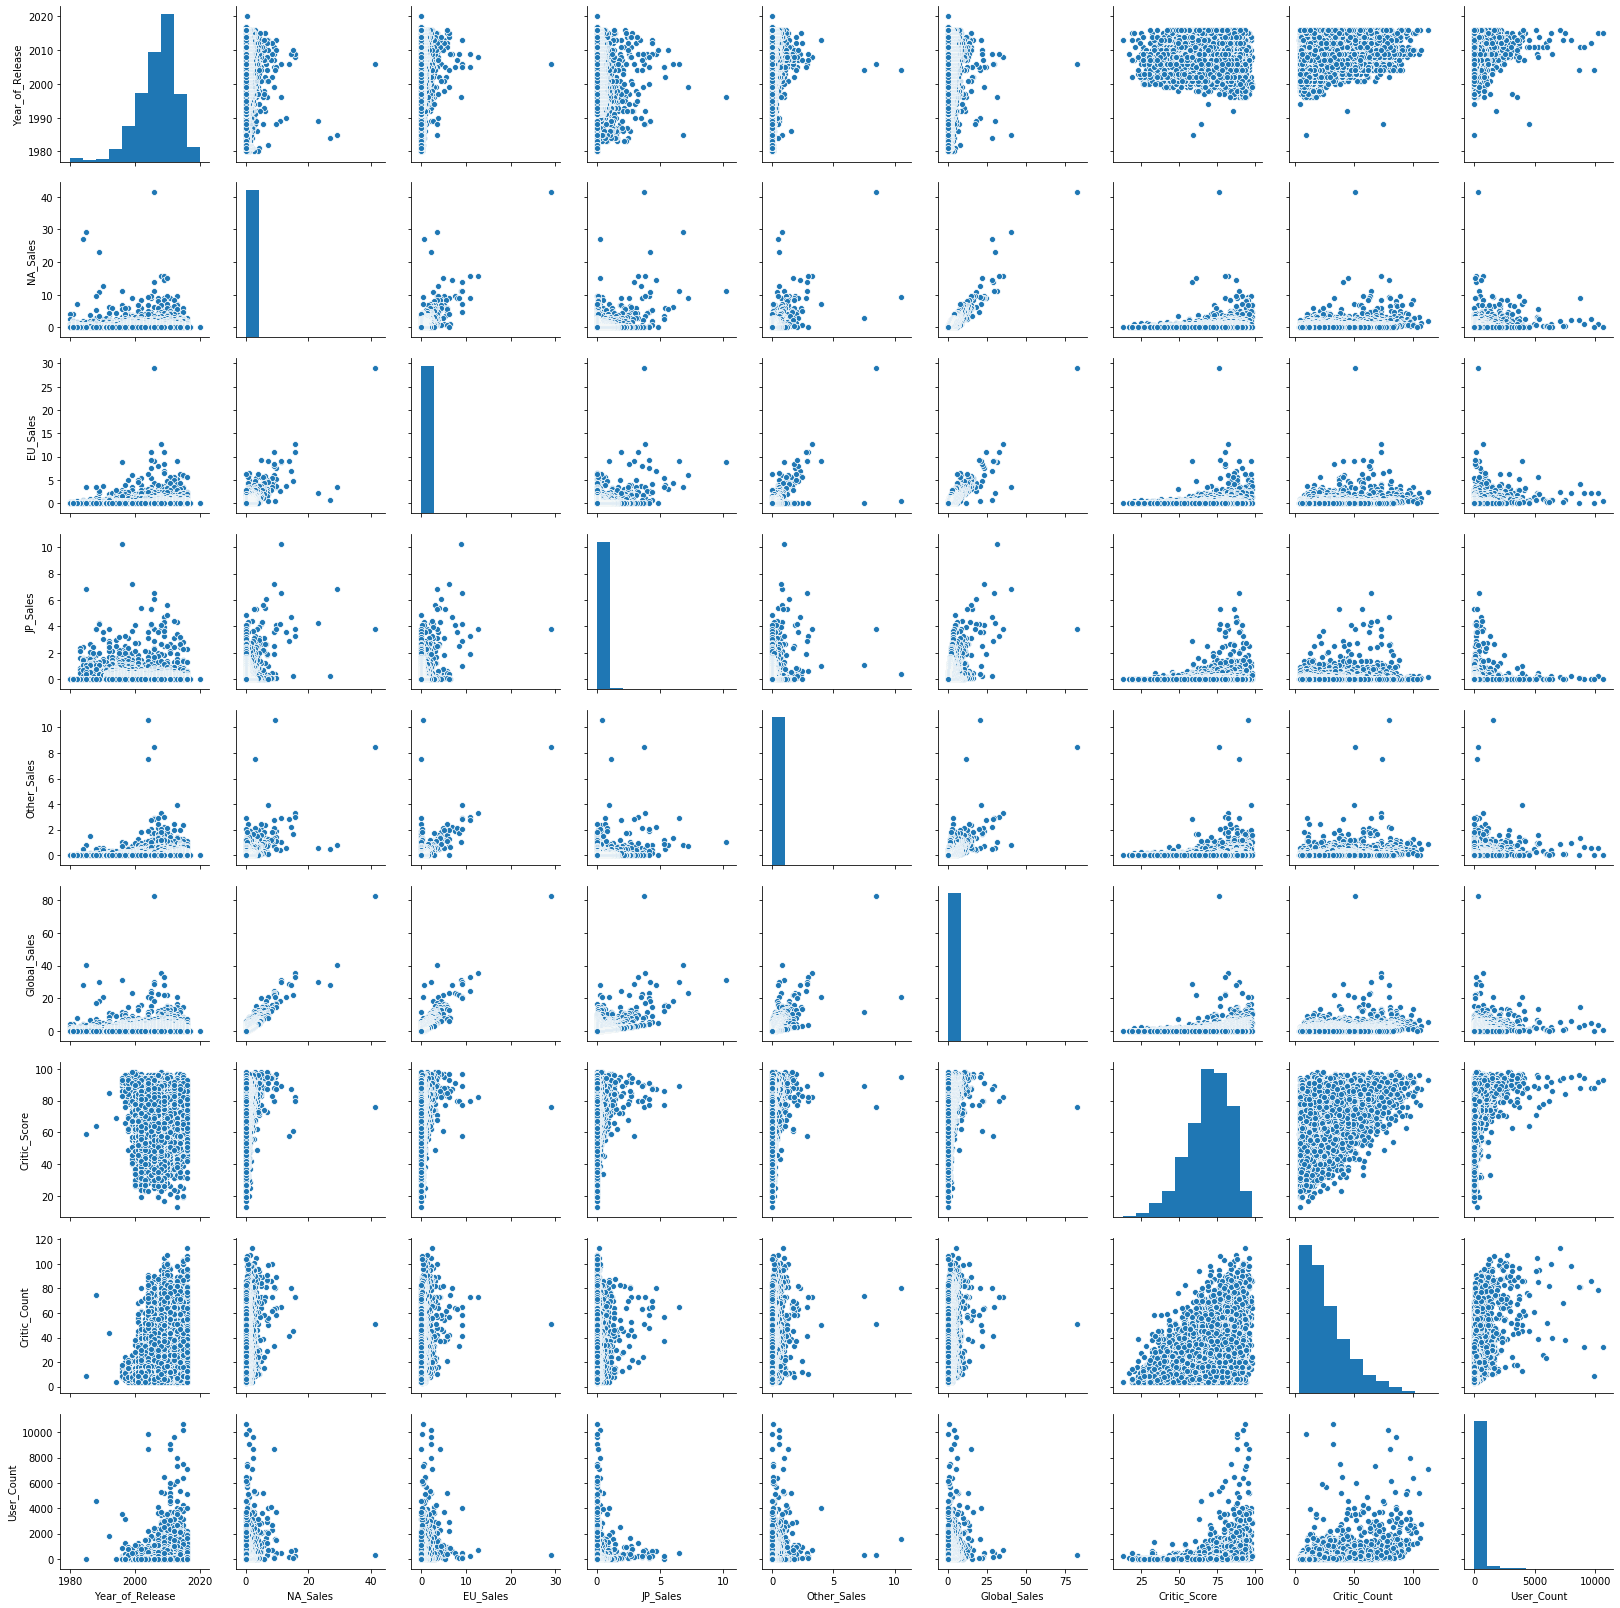

In [15]:
sns.pairplot(video_game_df);

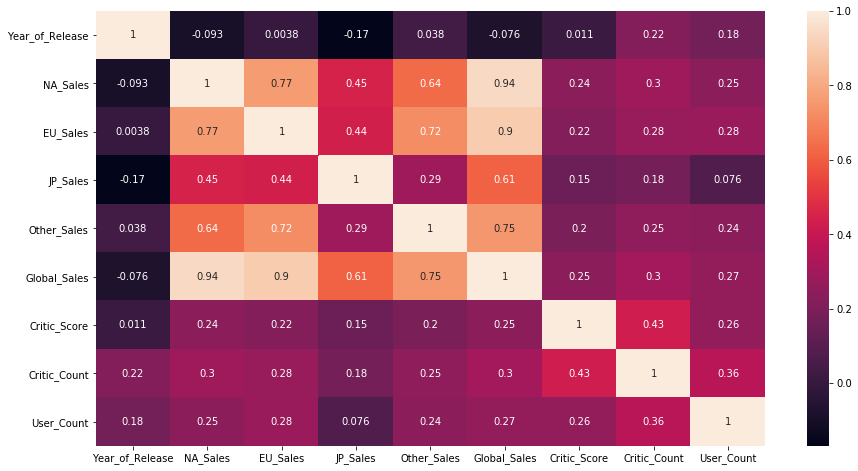

In [20]:
fig, ax = plt.subplots(figsize=(15,8))  
sns.heatmap(video_game_df.corr(), annot=True, ax=ax);

# Data Prep

In [88]:
video_game_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.06,23.7,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,72.65,32.49,NaN,NaN,NaN,NaN


In [110]:
video_game_df['User_Score'] = video_game_df['User_Score'].map(lambda x: np.nan if isinstance(x, float) else x)
video_game_df['User_Score'] = video_game_df['User_Score'].astype('float64')

ValueError: could not convert string to float: 'tbd'

In [111]:
video_game_df = video_game_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_CRITIC_SCORE_AVG, 3, 10),  axis=1)

In [112]:
video_game_df = video_game_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_CRITIC_COUNT_AVG, 3, 11),  axis=1)

In [113]:
video_game_df = video_game_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_CRITIC_COUNT_AVG, 3, 12),  axis=1)